# Car brand classifier using deep learning

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

**Here we use the ResNet50 transfer learning model in our problem statement.**

In [2]:
image_size = [224,224]
train_path = ('Datasets/train')
test_path = ('Datasets/test')

The image size is basically we set the standerd size for all the images.

In [3]:
resnet = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

1) Here we initialises ResNet50 model with input size as ***[224,224,3]*** *(224 for pixel size and 3 is for RGB channel)*. 

2) We have to use the same weights in our model as used in ResNet50 so we kept **weights = imagenet**.

3) **include_top = False** is basically we do not want to use first and last layer of that ResNet50 pre-trained model in our problem so we kept it as False.

4) The summary gives idea about architecture of ResNet50 model and there we can see there is no input and output layer in that architecture.

In [5]:
for layer in resnet.layers:
    layer.trainable = False

We don't want to retrain that model, as we do this the weights will be updated, but we want to use the same weights henceforth we set layers.trainable of initialised resnet model as false.

In [6]:
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

This glob function is basically used to show how many folders are there in our train dataset.

In [7]:
x = Flatten()(resnet.output)
predicted = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predicted)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

1) Here first we flattened the output of resnet model to be used in our model.

2) Then we created a last dense layer using flattened output, softmax as activation function and we need to predict 3 claases hence we use len(folders) as 3.

3) Last we created a model using resnet input and output.

**In model summary we can see our last dense layer with 3 neurons**

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [9]:
generated_train = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    rotation_range = 90,
                                    horizontal_flip = True,
                                     vertical_flip = True
                                    )
generated_test = ImageDataGenerator(rescale = 1./255)

Here we used **ImageDataGenerator** function for data augmentation only on train dataset and for test dataset we are rescaling our image size to 0 to 1.

In [10]:
train_data = generated_train.flow_from_directory('Datasets/train',
                                                target_size = (224,224),
                                                batch_size = 32, 
                                                class_mode = 'categorical')

test_data = generated_test.flow_from_directory('Datasets/test',
                                                target_size = (224,224),
                                                batch_size = 32, 
                                                class_mode = 'categorical')

Found 90 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


we stored our new generated data in new variable.The flow_from_directory function is used for applying data augmentation methods on our original dataset. And same is done for test dataset.

In [11]:
len(train_data)

3

In [12]:
model_1 = model.fit_generator(generator = train_data,  validation_data = test_data,
                             epochs = 25, steps_per_epoch = len(train_data),
                             validation_steps = len(test_data))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
3/3 [==============================] - 13s 4s/step - loss: 7.5159 - accuracy: 0.3556 - val_loss: 7.1791 - val_accuracy: 0.3220
Epoch 2/25
3/3 [==============================] - 11s 4s/step - loss: 3.9869 - accuracy: 0.4556 - val_loss: 5.7698 - val_accuracy: 0.1695
Epoch 3/25
3/3 [==============================] - 11s 4s/step - loss: 4.8712 - accuracy: 0.4333 - val_loss: 3.3458 - val_accuracy: 0.3559
Epoch 4/25
3/3 [==============================] - 11s 4s/step - loss: 2.3611 - accuracy: 0.3667 - val_loss: 3.2986 - val_accuracy: 0.3220
Epoch 5/25
3/3 [==============================] - 11s 4s/step - loss: 3.0807 - accuracy: 0.2778 - val_loss: 2.9195 - val_accuracy: 0.5085
Epoch 6/25
3/3 [==============================] - 11s 4s/step - loss: 2.4374 - accuracy: 0.4444 - val_loss: 1.9855 - val_accuracy: 0.1864
Epoch 7/25
3/3 [==============================] - 12s 4s/step - loss: 1.9271 - accuracy: 0.3778 

Now we fit our model  with 25 epochs. Steps per epoch defines number of batches to be selected per epoch i.e. here we have 3 classes so it will take 3 batches to complete 1 epoch and same is the case with validation_steps but this is only on test dataset.

In [13]:
model_1.history

{'loss': [7.515934467315674,
  3.9869296550750732,
  4.871224403381348,
  2.361140012741089,
  3.0807015895843506,
  2.4373550415039062,
  1.9270532131195068,
  1.550333023071289,
  1.8290239572525024,
  1.9821341037750244,
  1.7494863271713257,
  1.6257003545761108,
  1.5245436429977417,
  1.4572733640670776,
  1.0383281707763672,
  1.2761915922164917,
  1.3704763650894165,
  0.9092011451721191,
  0.9355458617210388,
  1.07895028591156,
  1.1297998428344727,
  0.8779706954956055,
  1.0933676958084106,
  1.0894544124603271,
  1.0291101932525635],
 'accuracy': [0.35555556416511536,
  0.4555555582046509,
  0.4333333373069763,
  0.36666667461395264,
  0.2777777910232544,
  0.4444444477558136,
  0.3777777850627899,
  0.42222222685813904,
  0.47777777910232544,
  0.35555556416511536,
  0.47777777910232544,
  0.5333333611488342,
  0.4333333373069763,
  0.5666666626930237,
  0.5777778029441833,
  0.47777777910232544,
  0.5444444417953491,
  0.5444444417953491,
  0.5777778029441833,
  0.544444

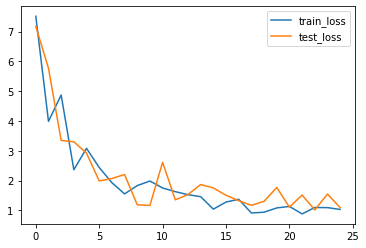

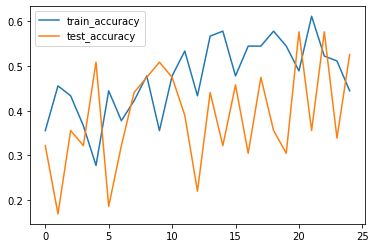

<Figure size 432x288 with 0 Axes>

In [14]:
## plot for losses
plt.plot(model_1.history['loss'], label = 'train_loss')
plt.plot(model_1.history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()
plt.savefig('losses_plot')

##plot for accuracy
plt.plot(model_1.history['accuracy'], label = 'train_accuracy')
plt.plot(model_1.history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy_plot')


As we can see from the above graphs that both train and test loss are conisiding together quickly at 25 epoch both the losses are coming almost 1. But for accuracy, for near about 20 epochs training accuracy is high and then it decreases, but test accuracy is constantly fluctuating.

In [15]:
from tensorflow.keras.models import load_model
model.save('car_brand.h5')

In [74]:
y_pred = model.predict(test_data)
y_pred[:5]

array([[0.47600526, 0.25429046, 0.26970428],
       [0.20425637, 0.75368804, 0.04205561],
       [0.37868908, 0.5783848 , 0.04292603],
       [0.37251553, 0.48420283, 0.14328161],
       [0.24125636, 0.7192158 , 0.03952785]], dtype=float32)

In [75]:
y_pred = np.argmax(y_pred, axis = 1)

In [76]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

This y_pred predicts the class for each image in test dataset.

**0 means it is audi**

**1 means it is lamborghini**

**2 means it is mercedes**

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model = load_model('car_brand.h5')

In [53]:
img = image.load_img('Datasets/Test/audi/40.jpg', target_size = (224,224))

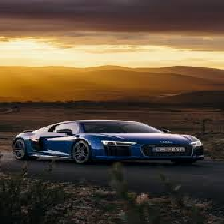

In [54]:
img

In [55]:
x = image.img_to_array(img)
x

array([[[89., 72., 78.],
        [89., 72., 78.],
        [89., 72., 78.],
        ...,
        [62., 50., 52.],
        [62., 50., 52.],
        [62., 50., 52.]],

       [[85., 68., 74.],
        [85., 68., 74.],
        [85., 68., 74.],
        ...,
        [61., 49., 51.],
        [61., 49., 51.],
        [61., 49., 51.]],

       [[81., 64., 70.],
        [82., 65., 71.],
        [82., 65., 71.],
        ...,
        [60., 48., 50.],
        [60., 48., 50.],
        [60., 48., 50.]],

       ...,

       [[ 6., 10.,  9.],
        [ 6., 10.,  9.],
        [ 6., 10.,  9.],
        ...,
        [42., 41., 37.],
        [42., 41., 37.],
        [27., 26., 22.]],

       [[ 6., 10.,  9.],
        [ 6., 10.,  9.],
        [ 6., 10.,  9.],
        ...,
        [30., 29., 24.],
        [30., 29., 24.],
        [26., 25., 20.]],

       [[ 5.,  9.,  8.],
        [ 5.,  9.,  8.],
        [ 5.,  9.,  8.],
        ...,
        [29., 28., 23.],
        [29., 28., 23.],
        [25., 24., 19.]]

In [56]:
x.shape

(224, 224, 3)

In [57]:
x = x/255

In [58]:
x

array([[[0.34901962, 0.28235295, 0.30588236],
        [0.34901962, 0.28235295, 0.30588236],
        [0.34901962, 0.28235295, 0.30588236],
        ...,
        [0.24313726, 0.19607843, 0.20392157],
        [0.24313726, 0.19607843, 0.20392157],
        [0.24313726, 0.19607843, 0.20392157]],

       [[0.33333334, 0.26666668, 0.2901961 ],
        [0.33333334, 0.26666668, 0.2901961 ],
        [0.33333334, 0.26666668, 0.2901961 ],
        ...,
        [0.23921569, 0.19215687, 0.2       ],
        [0.23921569, 0.19215687, 0.2       ],
        [0.23921569, 0.19215687, 0.2       ]],

       [[0.31764707, 0.2509804 , 0.27450982],
        [0.32156864, 0.25490198, 0.2784314 ],
        [0.32156864, 0.25490198, 0.2784314 ],
        ...,
        [0.23529412, 0.1882353 , 0.19607843],
        [0.23529412, 0.1882353 , 0.19607843],
        [0.23529412, 0.1882353 , 0.19607843]],

       ...,

       [[0.02352941, 0.03921569, 0.03529412],
        [0.02352941, 0.03921569, 0.03529412],
        [0.02352941, 0

In [59]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[4.5012977e-02, 5.5778548e-07, 9.5498651e-01]], dtype=float32)

In [63]:
np.argmax(model.predict(img_data))

2